# Testing classifiers on the 10k pairs dataset

## Loading in data

In [1]:
!pip install pandas 

import pandas as pd


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# Load in data

dtype_dict_all = {
    'conversation_id': 'object',
    'id': 'object',
    'author_id': 'object',
    'referenced_tweets_id': 'object',
    'in_reply_to_user_id': 'object',
    'PNR': 'object'
}

pairs = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY_Ida/Creating dataset of reference tweets/10k_twitter_pairs.csv', dtype=dtype_dict_all )

pairs

,conversation_id,lang,created_at,id,text,author_id,replied_to_reply_count,referenced_tweets_id,in_reply_to_user_id,PNR,...,A/R,fasttext_cos_sim_hate_sentence,fasttext_cos_sim_prosocial_sentence,tweeter_username,tweeter_name,pair_num,type,like_n,retweet_n,quote_n
0,1036583587242549248,da,2018-09-03 21:04:41,1036721666628444160,@frkomo Jeg siger det vel strengt taget bare t...,1666088336,1.0,1036721302692917250,148061237,1311570613,...,0-0,0.762309,0.959726,NaN,NaN,1,reply,1,0,0
1,1036583587242549248,da,2018-09-03 21:03:14,1036721302692917250,"@MonbergSF Sig det til spillerforeningen, som ...",148061237,NaN,NaN,1666088336,NaN,...,NaN,NaN,NaN,frkomo,Sarah Agerklint,1,tweet,1,0,0
2,899548260863488002,da,2017-08-21 12:10:42,899604671375052801,"@PeterHuggler Had alt det, du vil. Men du skal...",547416021,1.0,899603561323081729,3301029597,1405772015,...,0-0,0.836744,0.958750,NaN,NaN,2,reply,0,0,0
3,899548260863488002,da,2017-08-21 12:06:17,899603561323081729,@brianweichardt Jeg hader den her slags: Du gå...,3301029597,NaN,NaN,547416021,NaN,...,NaN,NaN,NaN,PeterHuggler,Peter Huggler,2,tweet,1,0,0
4,1345496479583113217,da,2021-01-03 12:38:16,1345711074407014400,@nielscallesoe @Heunicke Din første indvending...,87923613,1.0,1345524516311748608,23341699,0908801199,...,0-0,0.746267,0.957824,NaN,NaN,3,reply,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1430605648878784513,da,2021-08-25 19:00:13,1430605952722604045,@PSkipperEL Træk den røde linje nu.\n\n#VæltMe...,2345329126,NaN,NaN,611076925,NaN,...,NaN,NaN,NaN,M_K_Petersen,Michael K. Petersen,9998,tweet,16,0,0
19996,822180433681088513,da,2017-01-19 20:55:03,822185628620226560,@sllaursen har svært ved at afgøre om jeg ægte...,546738902,1.0,822180433681088513,43529378,1007802400,...,0-0,0.886249,0.839126,NaN,NaN,9999,reply,3,0,0
19997,822180433681088513,da,2017-01-19 20:34:25,822180433681088513,"Når et sponsorat rammer ESPN, er man kommet ok...",43529378,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,steen,Steen Laursen,9999,tweet,13,1,0
19998,953648851721826304,da,2018-01-17 18:22:52,953694124049420288,@emilnielsen @pelledragsted Tak skal du have. ...,26210681,0.0,953655858675757057,19391295,2010772527,...,0-1,0.886244,0.897734,NaN,NaN,10000,reply,10,0,0


In [3]:
pairs.dtypes

conversation_id                         object
lang                                    object
created_at                              object
id                                      object
text                                    object
author_id                               object
replied_to_reply_count                 float64
referenced_tweets_id                    object
in_reply_to_user_id                     object
PNR                                     object
surveyXact_externke                     object
non_unique_twitter_author_id           float64
started_survey                         float64
rec-nition                             float64
attack                                 float64
A/R                                     object
fasttext_cos_sim_hate_sentence         float64
fasttext_cos_sim_prosocial_sentence    float64
tweeter_username                        object
tweeter_name                            object
pair_num                                 int64
type         

In [4]:
!pip install --upgrade transformers
!pip install --upgrade tqdm


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [5]:
#Make a test df to work with 

pairs_small= pairs.head(2000)

In [8]:
# make a translated text column (on the small df)

from tqdm import tqdm
from transformers import MarianMTModel, MarianTokenizer

# Load the model and tokenizer
model_name = 'Helsinki-NLP/opus-mt-da-en'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

def translate(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True)
    # Generate translation
    translated_tokens = model.generate(**inputs)
    # Decode the tokens to text
    translated_text = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
    return translated_text


# List to store the scores
list = []

# Iterate over each text
for text in (tqdm(pairs_small['text'], desc= "translating")) :
    result = translate(text)
    # Append to the list
    list.append(result)

# Add the scores as a new column in the DataFrame
pairs_small['translated'] = list
pairs_small

# Save translated as new df
pairs_small.to_csv('/Users/idahelenedencker/Desktop/w_translated_small.csv', index=False)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, 

,conversation_id,lang,created_at,id,text,author_id,replied_to_reply_count,referenced_tweets_id,in_reply_to_user_id,PNR,...,fasttext_cos_sim_hate_sentence,fasttext_cos_sim_prosocial_sentence,tweeter_username,tweeter_name,pair_num,type,like_n,retweet_n,quote_n,translated
0,1036583587242549248,da,2018-09-03 21:04:41,1036721666628444160,@frkomo Jeg siger det vel strengt taget bare t...,1666088336,1.0,1036721302692917250,148061237,1311570613,...,0.762309,0.959726,NaN,NaN,1,reply,1,0,0,@frkomo I guess I'm saying it strictly just to...
1,1036583587242549248,da,2018-09-03 21:03:14,1036721302692917250,"@MonbergSF Sig det til spillerforeningen, som ...",148061237,NaN,NaN,1666088336,NaN,...,NaN,NaN,frkomo,Sarah Agerklint,1,tweet,1,0,0,"@MonbergSF Tell it to the gaming association, ..."
2,899548260863488002,da,2017-08-21 12:10:42,899604671375052801,"@PeterHuggler Had alt det, du vil. Men du skal...",547416021,1.0,899603561323081729,3301029597,1405772015,...,0.836744,0.958750,NaN,NaN,2,reply,0,0,0,@PeterHuggler Had everything you want. But don...
3,899548260863488002,da,2017-08-21 12:06:17,899603561323081729,@brianweichardt Jeg hader den her slags: Du gå...,3301029597,NaN,NaN,547416021,NaN,...,NaN,NaN,PeterHuggler,Peter Huggler,2,tweet,1,0,0,@brianweichardt I hate this kind of thing: You...
4,1345496479583113217,da,2021-01-03 12:38:16,1345711074407014400,@nielscallesoe @Heunicke Din første indvending...,87923613,1.0,1345524516311748608,23341699,0908801199,...,0.746267,0.957824,NaN,NaN,3,reply,1,0,0,@nielsallesoe @Heunicke Your first objection m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1285495153202024448,da,2020-07-21 10:22:06,1285520419529863168,@SimonStoerup @perlysholt Hm. Man ville som ud...,27626050,NaN,NaN,383396359,NaN,...,NaN,NaN,nielsfez,Niels Pedersen,998,tweet,2,0,0,@SimonStoerup @perlysholt Hm. You would be abl...
1996,1174395406719102976,da,2019-09-18 19:10:18,1174400270710820870,@R4nd4hl @khoenge Sjovt du synes netop Hønge b...,861057936,0.0,1174395406719102976,72823792,1508892043,...,0.736094,0.932785,NaN,NaN,999,reply,2,0,0,@R4nd4hl @khoenge Funny you think just Hønge s...
1997,1174395406719102976,da,2019-09-18 18:50:58,1174395406719102976,Detektor har undersøgt det: @khoenge talte usa...,72823792,NaN,NaN,NaN,NaN,...,NaN,NaN,R4nd4hl,Randahl Fink,999,tweet,20,3,0,Detector has examined it: @khoenge spoke untru...
1998,1481298462238982144,da,2022-01-12 19:25:54,1481346717513662464,"@ReneAndersenDK Forskellen er, at ham her også...",805874425988087811,1.0,1481345545721495554,4776986009,NaN,...,0.787638,0.932775,NaN,NaN,1000,reply,2,0,0,@ReneAndersenDK The difference is that this gu...


In [7]:
#load in again
dtype_dict_all = {
    'conversation_id': 'object',
    'id': 'object',
    'author_id': 'object',
    'referenced_tweets_id': 'object',
    'in_reply_to_user_id': 'object',
    'PNR': 'object'
}

pairs_small = pd.read_csv('/Users/idahelenedencker/Desktop/w_translated_small.csv', dtype=dtype_dict_all)




In [8]:
print(pairs_small[['text', 'translated']].head(10))

                                                text  \
0  @frkomo Jeg siger det vel strengt taget bare t...   
1  @MonbergSF Sig det til spillerforeningen, som ...   
2  @PeterHuggler Had alt det, du vil. Men du skal...   
3  @brianweichardt Jeg hader den her slags: Du gå...   
4  @nielscallesoe @Heunicke Din første indvending...   
5  @stinuslindgreen @Heunicke I min optik, er det...   
6  @RasmusMalver @radikale Det er jeg ked af. Jeg...   
7  Indtil for en time siden var @stinuslindgreen ...   
8  @larskohler @BEsbensen @PiaOlsen Lidt, men jeg...   
9  @ThomasMonbergSF Vi løber vist i ring!... Ha e...   

                                          translated  
0  @frkomo I guess I'm saying it strictly just to...  
1  @MonbergSF Tell it to the gaming association, ...  
2  @PeterHuggler Had everything you want. But don...  
3  @brianweichardt I hate this kind of thing: You...  
4  @nielsallesoe @Heunicke Your first objection m...  
5  @stinuslindgreen @Heunicke In my optics, it is... 

In [ ]:
# make a translated text column (on the full df)

#from tqdm import tqdm
#from transformers import MarianMTModel, MarianTokenizer

# Load the model and tokenizer
#model_name = 'Helsinki-NLP/opus-mt-da-en'
#tokenizer = MarianTokenizer.from_pretrained(model_name)
#model = MarianMTModel.from_pretrained(model_name)

#def translate(text):
    # Tokenize the input text
    #inputs = tokenizer(text, return_tensors="pt", padding=True)
    # Generate translation
    #translated_tokens = model.generate(**inputs)
    # Decode the tokens to text
    #translated_text = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
    #return translated_text


# List to store the scores
list = []

# Iterate over each text
for text in (tqdm(pairs['text'], desc= "translating")) :
    result = translate(text)
    # Append to the list
    list.append(result)

# Add the scores as a new column in the DataFrame
pairs['translated'] = list
pairs

# Save
pairs.to_csv('/Users/idahelenedencker/Desktop/w_translated_full.csv', index=False)

#Load in
dtype_dict_all = {
    'conversation_id': 'object',
    'id': 'object',
    'author_id': 'object',
    'referenced_tweets_id': 'object',
    'in_reply_to_user_id': 'object',
    'PNR': 'object'
}

pairs = pd.read_csv('/Users/idahelenedencker/Desktop/w_translated_full.csv', dtype=dtype_dict_all)




## Zero shot learning (3 different models)

In zero shot learning a pre-trained model is used to predict the give a probability on any given label using embeddings, even though the label(s) has not been part of the training data

### facebook/bart-large-mnli model

In [9]:
from transformers import pipeline

In [10]:
pipe_1 = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=0)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [11]:
candidate_labels = ['counterspeech', 'hate', 'neutral tone']

sequence_to_classify_1 = "i see your point but i dont think it is very constructive"
sequence_to_classify_2 = "jeg forstår hvad du mener, men din kommentar er ikke særlig konstruktiv"
sequence_to_classify_3 = pairs['text'][3]
sequence_to_classify_4 = "today i went for a walk outside with my dog, nice sunny weather"

pipe_1(sequence_to_classify_2, candidate_labels)

# seems good on danish too


{'sequence': 'jeg forstår hvad du mener, men din kommentar er ikke særlig konstruktiv',
 'labels': ['counterspeech', 'neutral tone', 'hate'],
 'scores': [0.819023072719574, 0.17399725317955017, 0.006979694124311209]}

In [17]:
# on test data (translated)

# Candidate labels
candidate_labels = ['counterspeech', 'hate', 'neutral tone']

# List to store the scores
counterspeech_scores = []
hate_scores = []
neutral_scores = []

# Iterate over each text
for text in (tqdm(pairs_small['translated'], desc= "Extracting scores")) :
    result = pipe_1(text, candidate_labels)
    # Extract the scores
    counterspeech_score = dict(zip(result['labels'], result['scores']))['counterspeech']
    hate_score = dict(zip(result['labels'], result['scores']))['hate']
    neutral_score = dict(zip(result['labels'], result['scores']))['neutral tone']
    # Append the scores to the lists
    counterspeech_scores.append(counterspeech_score)
    hate_scores.append(hate_score)
    neutral_scores.append(neutral_score)

# Add the scores as a new column in the DataFrame
pairs_small['ZS_counterspeech_score'] = counterspeech_scores
pairs_small['ZS_hate_score'] = hate_scores
pairs_small['ZS_neutral_score'] = neutral_scores


# Initialize the 'counterspeech' column with 'NA'
pairs_small['ZS_counterspeech'] = 'NA'

# Update the 'counterspeech' column based on the 'counterspeech_score'
for index, row in pairs_small.iterrows():
    if row['ZS_counterspeech_score'] > 0.8:
        pairs_small.at[index, 'ZS_counterspeech'] = 'yes'
    else:
        pairs_small.at[index, 'ZS_counterspeech'] = 'no'    


pairs_small

Extracting scores: 100%|████████████████████| 2000/2000 [06:47<00:00,  4.90it/s]


,conversation_id,lang,created_at,id,text,author_id,replied_to_reply_count,referenced_tweets_id,in_reply_to_user_id,PNR,...,pair_num,type,like_n,retweet_n,quote_n,translated,ZS_counterspeech_score,ZS_hate_score,ZS_neutral_score,ZS_counterspeech
0,1036583587242549248,da,2018-09-03 21:04:41,1036721666628444160,@frkomo Jeg siger det vel strengt taget bare t...,1666088336,1.0,1036721302692917250,148061237,1311570613,...,1,reply,1,0,0,@frkomo I guess I'm saying it strictly just to...,0.632259,0.034136,0.333605,no
1,1036583587242549248,da,2018-09-03 21:03:14,1036721302692917250,"@MonbergSF Sig det til spillerforeningen, som ...",148061237,NaN,NaN,1666088336,NaN,...,1,tweet,1,0,0,"@MonbergSF Tell it to the gaming association, ...",0.951389,0.019291,0.029320,yes
2,899548260863488002,da,2017-08-21 12:10:42,899604671375052801,"@PeterHuggler Had alt det, du vil. Men du skal...",547416021,1.0,899603561323081729,3301029597,1405772015,...,2,reply,0,0,0,@PeterHuggler Had everything you want. But don...,0.317035,0.016395,0.666571,no
3,899548260863488002,da,2017-08-21 12:06:17,899603561323081729,@brianweichardt Jeg hader den her slags: Du gå...,3301029597,NaN,NaN,547416021,NaN,...,2,tweet,1,0,0,@brianweichardt I hate this kind of thing: You...,0.095866,0.883837,0.020297,no
4,1345496479583113217,da,2021-01-03 12:38:16,1345711074407014400,@nielscallesoe @Heunicke Din første indvending...,87923613,1.0,1345524516311748608,23341699,0908801199,...,3,reply,1,0,0,@nielsallesoe @Heunicke Your first objection m...,0.863429,0.016685,0.119886,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1285495153202024448,da,2020-07-21 10:22:06,1285520419529863168,@SimonStoerup @perlysholt Hm. Man ville som ud...,27626050,NaN,NaN,383396359,NaN,...,998,tweet,2,0,0,@SimonStoerup @perlysholt Hm. You would be abl...,0.768433,0.012006,0.219561,no
1996,1174395406719102976,da,2019-09-18 19:10:18,1174400270710820870,@R4nd4hl @khoenge Sjovt du synes netop Hønge b...,861057936,0.0,1174395406719102976,72823792,1508892043,...,999,reply,2,0,0,@R4nd4hl @khoenge Funny you think just Hønge s...,0.917323,0.018060,0.064617,yes
1997,1174395406719102976,da,2019-09-18 18:50:58,1174395406719102976,Detektor har undersøgt det: @khoenge talte usa...,72823792,NaN,NaN,NaN,NaN,...,999,tweet,20,3,0,Detector has examined it: @khoenge spoke untru...,0.829699,0.078995,0.091306,yes
1998,1481298462238982144,da,2022-01-12 19:25:54,1481346717513662464,"@ReneAndersenDK Forskellen er, at ham her også...",805874425988087811,1.0,1481345545721495554,4776986009,NaN,...,1000,reply,2,0,0,@ReneAndersenDK The difference is that this gu...,0.834556,0.091175,0.074269,yes


In [18]:
# on test data (danish)

# Candidate labels
candidate_labels = ['counterspeech', 'hate', 'neutral tone']

# List to store the scores
counterspeech_scores = []
hate_scores = []
neutral_scores = []

# Iterate over each text
for text in (tqdm(pairs_small['text'], desc= "Extracting scores")) :
    result = pipe_1(text, candidate_labels)
    # Extract the scores
    counterspeech_score = dict(zip(result['labels'], result['scores']))['counterspeech']
    hate_score = dict(zip(result['labels'], result['scores']))['hate']
    neutral_score = dict(zip(result['labels'], result['scores']))['neutral tone']
    # Append the scores to the lists
    counterspeech_scores.append(counterspeech_score)
    hate_scores.append(hate_score)
    neutral_scores.append(neutral_score)

# Add the scores as a new column in the DataFrame
pairs_small['ZS_counterspeech_score_dan'] = counterspeech_scores
pairs_small['ZS_hate_score_dan'] = hate_scores
pairs_small['ZS_neutral_score_dan'] = neutral_scores


# Initialize the 'counterspeech' column with 'NA'
pairs_small['ZS_counterspeech_dan'] = 'NA'

# Update the 'counterspeech' column based on the 'counterspeech_score'
for index, row in pairs_small.iterrows():
    if row['ZS_counterspeech_score_dan'] > 0.8:
        pairs_small.at[index, 'ZS_counterspeech_dan'] = 'yes'
    else:
        pairs_small.at[index, 'ZS_counterspeech_dan'] = 'no'    


pairs_small

Extracting scores: 100%|████████████████████| 2000/2000 [08:21<00:00,  3.99it/s]


,conversation_id,lang,created_at,id,text,author_id,replied_to_reply_count,referenced_tweets_id,in_reply_to_user_id,PNR,...,quote_n,translated,ZS_counterspeech_score,ZS_hate_score,ZS_neutral_score,ZS_counterspeech,ZS_counterspeech_score_dan,ZS_hate_score_dan,ZS_neutral_score_dan,ZS_counterspeech_dan
0,1036583587242549248,da,2018-09-03 21:04:41,1036721666628444160,@frkomo Jeg siger det vel strengt taget bare t...,1666088336,1.0,1036721302692917250,148061237,1311570613,...,0,@frkomo I guess I'm saying it strictly just to...,0.632259,0.034136,0.333605,no,0.765376,0.008536,0.226088,no
1,1036583587242549248,da,2018-09-03 21:03:14,1036721302692917250,"@MonbergSF Sig det til spillerforeningen, som ...",148061237,NaN,NaN,1666088336,NaN,...,0,"@MonbergSF Tell it to the gaming association, ...",0.951389,0.019291,0.029320,yes,0.853204,0.006963,0.139833,yes
2,899548260863488002,da,2017-08-21 12:10:42,899604671375052801,"@PeterHuggler Had alt det, du vil. Men du skal...",547416021,1.0,899603561323081729,3301029597,1405772015,...,0,@PeterHuggler Had everything you want. But don...,0.317035,0.016395,0.666571,no,0.575550,0.030307,0.394142,no
3,899548260863488002,da,2017-08-21 12:06:17,899603561323081729,@brianweichardt Jeg hader den her slags: Du gå...,3301029597,NaN,NaN,547416021,NaN,...,0,@brianweichardt I hate this kind of thing: You...,0.095866,0.883837,0.020297,no,0.616760,0.015232,0.368008,no
4,1345496479583113217,da,2021-01-03 12:38:16,1345711074407014400,@nielscallesoe @Heunicke Din første indvending...,87923613,1.0,1345524516311748608,23341699,0908801199,...,0,@nielsallesoe @Heunicke Your first objection m...,0.863429,0.016685,0.119886,yes,0.815085,0.017978,0.166937,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1285495153202024448,da,2020-07-21 10:22:06,1285520419529863168,@SimonStoerup @perlysholt Hm. Man ville som ud...,27626050,NaN,NaN,383396359,NaN,...,0,@SimonStoerup @perlysholt Hm. You would be abl...,0.768433,0.012006,0.219561,no,0.770013,0.019735,0.210252,no
1996,1174395406719102976,da,2019-09-18 19:10:18,1174400270710820870,@R4nd4hl @khoenge Sjovt du synes netop Hønge b...,861057936,0.0,1174395406719102976,72823792,1508892043,...,0,@R4nd4hl @khoenge Funny you think just Hønge s...,0.917323,0.018060,0.064617,yes,0.759511,0.142903,0.097587,no
1997,1174395406719102976,da,2019-09-18 18:50:58,1174395406719102976,Detektor har undersøgt det: @khoenge talte usa...,72823792,NaN,NaN,NaN,NaN,...,0,Detector has examined it: @khoenge spoke untru...,0.829699,0.078995,0.091306,yes,0.654120,0.126598,0.219282,no
1998,1481298462238982144,da,2022-01-12 19:25:54,1481346717513662464,"@ReneAndersenDK Forskellen er, at ham her også...",805874425988087811,1.0,1481345545721495554,4776986009,NaN,...,0,@ReneAndersenDK The difference is that this gu...,0.834556,0.091175,0.074269,yes,0.713310,0.019431,0.267258,no


In [44]:
#On full dataset

from tqdm import tqdm

# Candidate labels
candidate_labels = ['counterspeech', 'hate', 'neutral tone']

# List to store the scores
counterspeech_scores = []
hate_scores = []
neutral_scores = []

# Iterate over each text
for text in (tqdm(pairs['translated'], desc= "Extracting scores")) :
    result = pipe_1(text, candidate_labels)
    # Extract the scores
    counterspeech_score = dict(zip(result['labels'], result['scores']))['counterspeech']
    hate_score = dict(zip(result['labels'], result['scores']))['hate']
    neutral_score = dict(zip(result['labels'], result['scores']))['neutral tone']
    # Append the scores to the lists
    counterspeech_scores.append(counterspeech_score)
    hate_scores.append(hate_score)
    neutral_scores.append(neutral_score)

# Add the scores as a new column in the DataFrame
pairs['ZS_counterspeech_score'] = counterspeech_scores
pairs['ZS_hate_score'] = hate_scores
pairs['ZS_neutral_score'] = neutral_scores


# Initialize the 'counterspeech' column with 'NA'
pairs['ZS_counterspeech'] = 'NA'

# Update the 'counterspeech' column based on the 'counterspeech_score'
for index, row in pairs.iterrows():
    if row['ZS_counterspeech_score'] > 0.8:
        pairs.at[index, 'ZS_counterspeech'] = 'yes'
    else:
        pairs.at[index, 'ZS_counterspeech'] = 'no'    


pairs

Extracting scores:   4%|▋                 | 797/20000 [07:40<3:05:01,  1.73it/s]


KeyboardInterrupt: 

In [19]:
!pip install seaborn matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


ZS_counterspeech_dan
no     1380
yes     620
Name: count, dtype: int64
ZS_counterspeech
yes    1040
no      960
Name: count, dtype: int64
Cohen's Kappa: 0.18242710795902284
Simple Agreement: 0.585


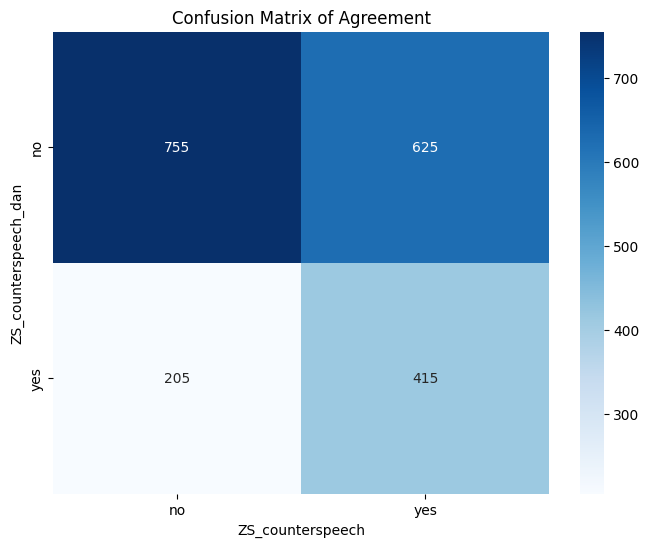

In [20]:
# look at performance and agreement (original vs. translated text) 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print(pairs_small['ZS_counterspeech_dan'].value_counts(dropna=False))
print(pairs_small['ZS_counterspeech'].value_counts(dropna=False))

#agreement 
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(pairs_small['ZS_counterspeech_dan'], pairs_small['ZS_counterspeech'])
print(f"Cohen's Kappa: {kappa}")

agreement = (pairs_small['ZS_counterspeech_dan'] == pairs_small['ZS_counterspeech']).mean()
print(f"Simple Agreement: {agreement}")


# Compute confusion matrix
conf_matrix = confusion_matrix(pairs_small['ZS_counterspeech_dan'], pairs_small['ZS_counterspeech'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])

# Add labels, title, and display the plot
plt.ylabel('ZS_counterspeech_dan')
plt.xlabel('ZS_counterspeech')
plt.title('Confusion Matrix of Agreement')
plt.show()

#low level of agreement, close to random 


In [22]:
#print
conunt_yes_dan= pairs_small[pairs_small['ZS_counterspeech_dan'] == 'yes']
conunt_no_dan= pairs_small[pairs_small['ZS_counterspeech_dan'] == 'no']
conunt_yes_eng= pairs_small[pairs_small['ZS_counterspeech'] == 'yes']
conunt_no_eng= pairs_small[pairs_small['ZS_counterspeech'] == 'no']


text_to_print = conunt_yes_dan['text'].head(20).tolist()
text_to_print #not very accurate

text_to_print = conunt_no_dan['text'].head(20).tolist()
text_to_print #seems almost as if the no's are more counterspeech than the yes's


text_to_print = conunt_yes_eng['translated'].head(20).tolist()
text_to_print #quite good 

text_to_print = conunt_no_eng['translated'].head(20).tolist()
text_to_print #allright, but failed to classify some obvious examples of counterspeech as that


["@frkomo I guess I'm saying it strictly just to those who follow me;) But if you follow the subsequent discussion, then I'm just not impressed by the approach the players have:)",
 "@PeterHuggler Had everything you want. But don't judge what I think is a natural reaction. I'm not covering that case at all.",
 '@brianweichardt I hate this kind of thing: You go in and make yourself a judge, based on a photo. Let the court do its job, and seek only to communicate the case.',
 '@stinuslindgreen @Heunicke In my optics, it is not a relevant concern. Several reasons. Main: First, because we do not have scale to make a difference. IF it gives increased selection in that direction, it happens no matter what we do. Second, we do not neglect other vaccines on that basis.',
 '@peterbrothersen Exactly... So thin post from @AnneFrostJepsen... "Don\'t beat the politicians even if they beat on a daily basis" Adult communication requires a desire from the politicians to act adultly and we still need t

In [23]:
conunt_no_dan

,conversation_id,lang,created_at,id,text,author_id,replied_to_reply_count,referenced_tweets_id,in_reply_to_user_id,PNR,...,quote_n,translated,ZS_counterspeech_score,ZS_hate_score,ZS_neutral_score,ZS_counterspeech,ZS_counterspeech_score_dan,ZS_hate_score_dan,ZS_neutral_score_dan,ZS_counterspeech_dan
0,1036583587242549248,da,2018-09-03 21:04:41,1036721666628444160,@frkomo Jeg siger det vel strengt taget bare t...,1666088336,1.0,1036721302692917250,148061237,1311570613,...,0,@frkomo I guess I'm saying it strictly just to...,0.632259,0.034136,0.333605,no,0.765376,0.008536,0.226088,no
2,899548260863488002,da,2017-08-21 12:10:42,899604671375052801,"@PeterHuggler Had alt det, du vil. Men du skal...",547416021,1.0,899603561323081729,3301029597,1405772015,...,0,@PeterHuggler Had everything you want. But don...,0.317035,0.016395,0.666571,no,0.575550,0.030307,0.394142,no
3,899548260863488002,da,2017-08-21 12:06:17,899603561323081729,@brianweichardt Jeg hader den her slags: Du gå...,3301029597,NaN,NaN,547416021,NaN,...,0,@brianweichardt I hate this kind of thing: You...,0.095866,0.883837,0.020297,no,0.616760,0.015232,0.368008,no
5,1345496479583113217,da,2021-01-03 00:16:57,1345524516311748608,"@stinuslindgreen @Heunicke I min optik, er det...",23341699,NaN,NaN,87923613,NaN,...,0,"@stinuslindgreen @Heunicke In my optics, it is...",0.628949,0.027665,0.343386,no,0.521844,0.021986,0.456171,no
6,1238602270129913857,da,2020-03-14 00:05:06,1238617110496059392,@RasmusMalver @radikale Det er jeg ked af. Jeg...,87923613,1.0,1238602270129913857,737702576506994688,0908801199,...,0,@RasmusMalver @radical I'm sorry. I want to un...,0.876910,0.037730,0.085360,yes,0.695842,0.030893,0.273265,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1285495153202024448,da,2020-07-21 12:57:34,1285559543276150784,@nielsfez @perlysholt Gode pointer. Og du har ...,383396359,0.0,1285520419529863168,27626050,0307932903,...,0,@nielsfez @perlysholt Good pointer. And you're...,0.861533,0.042326,0.096141,yes,0.799272,0.025806,0.174923,no
1995,1285495153202024448,da,2020-07-21 10:22:06,1285520419529863168,@SimonStoerup @perlysholt Hm. Man ville som ud...,27626050,NaN,NaN,383396359,NaN,...,0,@SimonStoerup @perlysholt Hm. You would be abl...,0.768433,0.012006,0.219561,no,0.770013,0.019735,0.210252,no
1996,1174395406719102976,da,2019-09-18 19:10:18,1174400270710820870,@R4nd4hl @khoenge Sjovt du synes netop Hønge b...,861057936,0.0,1174395406719102976,72823792,1508892043,...,0,@R4nd4hl @khoenge Funny you think just Hønge s...,0.917323,0.018060,0.064617,yes,0.759511,0.142903,0.097587,no
1997,1174395406719102976,da,2019-09-18 18:50:58,1174395406719102976,Detektor har undersøgt det: @khoenge talte usa...,72823792,NaN,NaN,NaN,NaN,...,0,Detector has examined it: @khoenge spoke untru...,0.829699,0.078995,0.091306,yes,0.654120,0.126598,0.219282,no


In [24]:
# test: model with counterspeech/non-counterspeech labels 

# Candidate labels
candidate_labels = ['counterspeech', 'no counterspeech']

# List to store the scores
counterspeech_scores = []
no_counterspeech_scores = []


# Iterate over each text
for text in (tqdm(pairs_small['translated'], desc= "Extracting scores")) :
    result = pipe_1(text, candidate_labels)
    # Extract the scores
    counterspeech_score = dict(zip(result['labels'], result['scores']))['counterspeech']
    no_counterspeech_score = dict(zip(result['labels'], result['scores']))['no counterspeech']
    # Append the scores to the lists
    counterspeech_scores.append(counterspeech_score)
    no_counterspeech_scores.append(no_counterspeech_score)

# Add the scores as a new column in the DataFrame
pairs_small['ZS_counterspeech_score_new_labels'] = counterspeech_scores
pairs_small['ZS_no_counterspeech_score_new_labels'] = no_counterspeech_scores


# Initialize the 'counterspeech' column with 'NA'
pairs_small['ZS_counterspeech_new_labels'] = 'NA'

# Update the 'counterspeech' column based on the 'counterspeech_score'
for index, row in pairs_small.iterrows():
    if row['ZS_counterspeech_score_new_labels'] > 0.8:
        pairs_small.at[index, 'ZS_counterspeech_new_labels'] = 'yes'
    else:
        pairs_small.at[index, 'ZS_counterspeech_new_labels'] = 'no'    


pairs_small


Extracting scores: 100%|████████████████████| 2000/2000 [04:16<00:00,  7.78it/s]


,conversation_id,lang,created_at,id,text,author_id,replied_to_reply_count,referenced_tweets_id,in_reply_to_user_id,PNR,...,ZS_hate_score,ZS_neutral_score,ZS_counterspeech,ZS_counterspeech_score_dan,ZS_hate_score_dan,ZS_neutral_score_dan,ZS_counterspeech_dan,ZS_counterspeech_score_new_labels,ZS_no_counterspeech_score_new_labels,ZS_counterspeech_new_labels
0,1036583587242549248,da,2018-09-03 21:04:41,1036721666628444160,@frkomo Jeg siger det vel strengt taget bare t...,1666088336,1.0,1036721302692917250,148061237,1311570613,...,0.034136,0.333605,no,0.765376,0.008536,0.226088,no,0.926184,0.073816,yes
1,1036583587242549248,da,2018-09-03 21:03:14,1036721302692917250,"@MonbergSF Sig det til spillerforeningen, som ...",148061237,NaN,NaN,1666088336,NaN,...,0.019291,0.029320,yes,0.853204,0.006963,0.139833,yes,0.976817,0.023183,yes
2,899548260863488002,da,2017-08-21 12:10:42,899604671375052801,"@PeterHuggler Had alt det, du vil. Men du skal...",547416021,1.0,899603561323081729,3301029597,1405772015,...,0.016395,0.666571,no,0.575550,0.030307,0.394142,no,0.852871,0.147129,yes
3,899548260863488002,da,2017-08-21 12:06:17,899603561323081729,@brianweichardt Jeg hader den her slags: Du gå...,3301029597,NaN,NaN,547416021,NaN,...,0.883837,0.020297,no,0.616760,0.015232,0.368008,no,0.911839,0.088161,yes
4,1345496479583113217,da,2021-01-03 12:38:16,1345711074407014400,@nielscallesoe @Heunicke Din første indvending...,87923613,1.0,1345524516311748608,23341699,0908801199,...,0.016685,0.119886,yes,0.815085,0.017978,0.166937,yes,0.962703,0.037297,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1285495153202024448,da,2020-07-21 10:22:06,1285520419529863168,@SimonStoerup @perlysholt Hm. Man ville som ud...,27626050,NaN,NaN,383396359,NaN,...,0.012006,0.219561,no,0.770013,0.019735,0.210252,no,0.790419,0.209581,no
1996,1174395406719102976,da,2019-09-18 19:10:18,1174400270710820870,@R4nd4hl @khoenge Sjovt du synes netop Hønge b...,861057936,0.0,1174395406719102976,72823792,1508892043,...,0.018060,0.064617,yes,0.759511,0.142903,0.097587,no,0.938951,0.061049,yes
1997,1174395406719102976,da,2019-09-18 18:50:58,1174395406719102976,Detektor har undersøgt det: @khoenge talte usa...,72823792,NaN,NaN,NaN,NaN,...,0.078995,0.091306,yes,0.654120,0.126598,0.219282,no,0.964718,0.035282,yes
1998,1481298462238982144,da,2022-01-12 19:25:54,1481346717513662464,"@ReneAndersenDK Forskellen er, at ham her også...",805874425988087811,1.0,1481345545721495554,4776986009,NaN,...,0.091175,0.074269,yes,0.713310,0.019431,0.267258,no,0.935881,0.064119,yes


In [25]:
pairs_small['ZS_counterspeech_new_labels'].value_counts(dropna=False) 


ZS_counterspeech_new_labels
yes    1775
no      225
Name: count, dtype: int64

In [26]:
#pull up text examples
new_label_no = pairs_small[pairs_small['ZS_counterspeech_new_labels'] == 'no']

# can print the whole text using
text_to_print_1 = new_label_no['translated'].head(20).tolist()
text_to_print_1

# the new labels doesnt change much, still alot of obvious examples of counterspeech is classified as not counterspeech


['@peterbrothersen Exactly... So thin post from @AnneFrostJepsen... "Don\'t beat the politicians even if they beat on a daily basis" Adult communication requires a desire from the politicians to act adultly and we still need to see',
 "@Nikolaj32LFC @EsbenSuurballe @ClarkJamesYNWA @larsmathiasen It sums everything up well. Just call us old angry men, I'll call it due diligence. Hope sincerely, you're right, but I would call our sporting management outright naive if they plan on such hopes. There's too much likelihood of it going wrong.",
 "@BrianArlyJac @politiken There is no contradiction between what you say here and what I say above. But for me it is not the moralist's problem, but ours. If man can only follow entertainment but not morals or self-preservation, then it (we) may not be able to save himself.",
 '@MagnusPharao @politiken I completely disagree with that - the moralists do not win this case. That is exactly what election after election shows.',
 '@mfsvendsen It was certai

### cross-encoder/nli-deberta-base model

In [27]:
pipe_2 = pipeline("zero-shot-classification", model="cross-encoder/nli-deberta-base", device=0)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [28]:
candidate_labels = ['counterspeech', 'hate', 'neutral tone']

sequence_to_classify_1 = "i see your point but i dont think it is very constructive"
sequence_to_classify_2 = "jeg forstår hvad du mener, men din kommentar er ikke særlig konstruktiv"


pipe_2(sequence_to_classify_1, candidate_labels)

# doesnt seem very good

{'sequence': 'i see your point but i dont think it is very constructive',
 'labels': ['counterspeech', 'neutral tone', 'hate'],
 'scores': [0.5037503242492676, 0.4367963671684265, 0.05945330858230591]}

### TarsClassifier 

In [29]:
!pip install Flair


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [30]:
from flair.models import TARSClassifier
from flair.data import Sentence


tars = TARSClassifier.load('tars-base')


sentence = Sentence("jeg forstår hvad du mener, men din kommentar er ikke særlig konstruktiv")
sentence_2 = Sentence("i understand, but i dont agree")


classes = ["counterspeech", "hate"]

tars.predict_zero_shot(sentence_2, classes)

print(sentence_2)

2024-08-08 13:47:34,778 TARS initialized without a task. You need to call .add_and_switch_to_new_task() before training this model
2024-08-08 13:47:34,870 Provided `None` does not exist in the model. Consider calling `add_and_switch_to_new_task` first.
2024-08-08 13:47:34,871 `ZeroShot` is the current task. Switch to some other task before dropping this.
Sentence[7]: "i understand, but i dont agree"


## Applying classification models (2 different models)

#### Counterargument classifier (from huggingface)


https://huggingface.co/ThinkCERCA/counterargument_hugging

In [31]:
pipe_3 = pipeline("text-classification", model="ThinkCERCA/counterargument_hugging", device=0)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [32]:
# Gives labels: Not Counterargument or Counterargument with a score

text = "I understand, but actually you are incorrect. Science show that the earth is round"
text_2 = "Jeg forstår din pointe, men den er ikke korrekt. Videnskaben viser at jorden er rund"
text_3 = "your a fool"
text_4 = "du er bare dum"
text_5 = "i like dogs, but also cats"

# Apply the pipeline to the text
result = pipe_3(text_5)
result

#seems a little too generous with the counterargument label



[{'label': 'Not Counterargument', 'score': 0.6886796355247498}]

In [33]:
# Test on small df (translated)

# List to store the scores
labels = []
scores = []

# Iterate over each text
for text in (tqdm(pairs_small['translated'], desc= "Extracting scores")) :
    result = pipe_3(text)
    # Extract the scores
    label = result[0]['label']
    score = result[0]['score']
    # Append the scores to the lists
    labels.append(label)
    scores.append(score)

# Add the scores as a new column in the DataFrame
pairs_small['coun_classifier_label_model1'] = labels
pairs_small['coun_classifier_score_model1'] = scores

pairs_small

Extracting scores: 100%|████████████████████| 2000/2000 [03:50<00:00,  8.68it/s]


,conversation_id,lang,created_at,id,text,author_id,replied_to_reply_count,referenced_tweets_id,in_reply_to_user_id,PNR,...,ZS_counterspeech,ZS_counterspeech_score_dan,ZS_hate_score_dan,ZS_neutral_score_dan,ZS_counterspeech_dan,ZS_counterspeech_score_new_labels,ZS_no_counterspeech_score_new_labels,ZS_counterspeech_new_labels,coun_classifier_label_model1,coun_classifier_score_model1
0,1036583587242549248,da,2018-09-03 21:04:41,1036721666628444160,@frkomo Jeg siger det vel strengt taget bare t...,1666088336,1.0,1036721302692917250,148061237,1311570613,...,no,0.765376,0.008536,0.226088,no,0.926184,0.073816,yes,Not Counterargument,0.712887
1,1036583587242549248,da,2018-09-03 21:03:14,1036721302692917250,"@MonbergSF Sig det til spillerforeningen, som ...",148061237,NaN,NaN,1666088336,NaN,...,yes,0.853204,0.006963,0.139833,yes,0.976817,0.023183,yes,Not Counterargument,0.979896
2,899548260863488002,da,2017-08-21 12:10:42,899604671375052801,"@PeterHuggler Had alt det, du vil. Men du skal...",547416021,1.0,899603561323081729,3301029597,1405772015,...,no,0.575550,0.030307,0.394142,no,0.852871,0.147129,yes,Counterargument,0.686435
3,899548260863488002,da,2017-08-21 12:06:17,899603561323081729,@brianweichardt Jeg hader den her slags: Du gå...,3301029597,NaN,NaN,547416021,NaN,...,no,0.616760,0.015232,0.368008,no,0.911839,0.088161,yes,Counterargument,0.825158
4,1345496479583113217,da,2021-01-03 12:38:16,1345711074407014400,@nielscallesoe @Heunicke Din første indvending...,87923613,1.0,1345524516311748608,23341699,0908801199,...,yes,0.815085,0.017978,0.166937,yes,0.962703,0.037297,yes,Counterargument,0.995546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1285495153202024448,da,2020-07-21 10:22:06,1285520419529863168,@SimonStoerup @perlysholt Hm. Man ville som ud...,27626050,NaN,NaN,383396359,NaN,...,no,0.770013,0.019735,0.210252,no,0.790419,0.209581,no,Counterargument,0.851246
1996,1174395406719102976,da,2019-09-18 19:10:18,1174400270710820870,@R4nd4hl @khoenge Sjovt du synes netop Hønge b...,861057936,0.0,1174395406719102976,72823792,1508892043,...,yes,0.759511,0.142903,0.097587,no,0.938951,0.061049,yes,Not Counterargument,0.564339
1997,1174395406719102976,da,2019-09-18 18:50:58,1174395406719102976,Detektor har undersøgt det: @khoenge talte usa...,72823792,NaN,NaN,NaN,NaN,...,yes,0.654120,0.126598,0.219282,no,0.964718,0.035282,yes,Not Counterargument,0.975029
1998,1481298462238982144,da,2022-01-12 19:25:54,1481346717513662464,"@ReneAndersenDK Forskellen er, at ham her også...",805874425988087811,1.0,1481345545721495554,4776986009,NaN,...,yes,0.713310,0.019431,0.267258,no,0.935881,0.064119,yes,Counterargument,0.767544


In [34]:
#check value counts
pairs_small['coun_classifier_label_model1'].value_counts(dropna=False) 


coun_classifier_label_model1
Counterargument        1276
Not Counterargument     724
Name: count, dtype: int64

In [35]:
# look at performance

#pull up text examples
Counterargument = pairs_small[pairs_small['coun_classifier_label_model1'] == 'Counterargument']
no_Counterargument = pairs_small[pairs_small['coun_classifier_label_model1'] == 'Not Counterargument']

# can print the whole text using
print('counterarguments:')
text_to_print_1 = Counterargument['translated'].head(20).tolist()
print(text_to_print_1)

print('no counterarguments:')
text_to_print_2 = no_Counterargument['translated'].head(20).tolist()
text_to_print_2

# Seems to work actually really good on the english tranlated text


counterarguments:
["@PeterHuggler Had everything you want. But don't judge what I think is a natural reaction. I'm not covering that case at all.", '@brianweichardt I hate this kind of thing: You go in and make yourself a judge, based on a photo. Let the court do its job, and seek only to communicate the case.', '@nielsallesoe @Heunicke Your first objection may be correct. It must be assessed. The second I do not understand. What other vaccines do we offer off-label?', '@stinuslindgreen @Heunicke In my optics, it is not a relevant concern. Several reasons. Main: First, because we do not have scale to make a difference. IF it gives increased selection in that direction, it happens no matter what we do. Second, we do not neglect other vaccines on that basis.', "@RasmusMalver @radical I'm sorry. I want to understand your concern - that's why I answer you - but unfortunately I have a little difficulty following your reasoning. It sounds like we're talking past each other. Maybe it's Twitte

["@frkomo I guess I'm saying it strictly just to those who follow me;) But if you follow the subsequent discussion, then I'm just not impressed by the approach the players have:)",
 '@MonbergSF Tell it to the gaming association, which is just fighting for DBU to have employer responsibility. Both with the gentlemen and the ladies',
 "Until an hour ago, @stinuslindgreen was on my top 5 over members of parliament. He is new in politics, but has really learned to bullshit. @Radio claimed that there was court control with access to private homes. There isn't. See how he tries to change direction. #dkpol https://t.co/37odfP9Y3O",
 "@ThomasMonbergSF I think we're running in a circle!... Have a good day and a go Pride!! • @BEsbensen @PiaOlsen",
 '@peterbrothersen Exactly... So thin post from @AnneFrostJepsen... "Don\'t beat the politicians even if they beat on a daily basis" Adult communication requires a desire from the politicians to act adultly and we still need to see',
 '@HellaSchulin @d

In [36]:
# Sort by 'score' in descending order
sorted_df = Counterargument.sort_values('coun_classifier_score_model1', ascending=False)

#print 
sorted_df['translated'].head(20).tolist()

# it's very obvious that lines like: 'On the other hand', 'One might take the view', 'You may very much disagree with me','in turn','You may be right, my point is','Your first objection may be correct', etc. gives high scores  

['@mbulskov @vesterby @tveskov @R4nd4hl On the other hand, we have retained the foolish etats structure unchanged since Evevælden, including the idea that a minister cannot fire an idiotic department chief. And two or three people in a Danish party decide who we can vote for. So we are actually worse off as Danes, right?',
 '@baretraet @PabloBresciani One might take the view that just this year you may not have missed so much...',
 "@Larsnoe @KraulDR Is that wrong? You may very much disagree with me. I just don't understand your criticism?",
 "@PruPruPruh You may be right about that. I see so much every day so I'll be happy when I meet a good person",
 'On the contrary @ACHorsensGULE has played some of the most entertaining games this year, along with #FCN and #BIF. Always garbage on. #AAB, #OB and #SIF have in turn been boring. #sldk #achsje https://t.co/jju6WVT9Vg',
 "@mollerjensen @Vestergaard_KB You may be right, my point is as long as she had actually thought the idea and we shoul

#### Bert counterspeech classifier (from huggingface)

Bert finetuned on the CONAN dataset

https://huggingface.co/tum-nlp/bert-counterspeech-classifier

In [37]:
pipe_4 = pipeline("text-classification", model="tum-nlp/bert-counterspeech-classifier",device=0)

In [38]:
text = "I understand, but actually you are incorrect. Science show that the earth is round"
text_2 = "Jeg forstår din pointe, men den er ikke korrekt. Videnskaben viser at jorden er rund"
text_3 = "you are a fool"

# Apply the pipeline to the text
result = pipe_4(text)
result

#Seems to work well on english data, not so good on danish data..

[{'label': 'counter-argument', 'score': 0.9996057152748108}]

In [39]:
# test on small df (translated)

# List to store the scores
labels = []
scores = []

# Iterate over each text
for text in (tqdm(pairs_small['translated'], desc= "Extracting scores")) :
    result = pipe_4(text)
    # Extract the scores
    label = result[0]['label']
    score = result[0]['score']
    # Append the scores to the lists
    labels.append(label)
    scores.append(score)

# Add the scores as a new column in the DataFrame
pairs_small['coun_classifier_label_model2'] = labels
pairs_small['coun_classifier_score_model2'] = scores

pairs_small

Extracting scores: 100%|████████████████████| 2000/2000 [03:53<00:00,  8.57it/s]


,conversation_id,lang,created_at,id,text,author_id,replied_to_reply_count,referenced_tweets_id,in_reply_to_user_id,PNR,...,ZS_hate_score_dan,ZS_neutral_score_dan,ZS_counterspeech_dan,ZS_counterspeech_score_new_labels,ZS_no_counterspeech_score_new_labels,ZS_counterspeech_new_labels,coun_classifier_label_model1,coun_classifier_score_model1,coun_classifier_label_model2,coun_classifier_score_model2
0,1036583587242549248,da,2018-09-03 21:04:41,1036721666628444160,@frkomo Jeg siger det vel strengt taget bare t...,1666088336,1.0,1036721302692917250,148061237,1311570613,...,0.008536,0.226088,no,0.926184,0.073816,yes,Not Counterargument,0.712887,counter-argument,0.999477
1,1036583587242549248,da,2018-09-03 21:03:14,1036721302692917250,"@MonbergSF Sig det til spillerforeningen, som ...",148061237,NaN,NaN,1666088336,NaN,...,0.006963,0.139833,yes,0.976817,0.023183,yes,Not Counterargument,0.979896,non-counter-argument,0.962320
2,899548260863488002,da,2017-08-21 12:10:42,899604671375052801,"@PeterHuggler Had alt det, du vil. Men du skal...",547416021,1.0,899603561323081729,3301029597,1405772015,...,0.030307,0.394142,no,0.852871,0.147129,yes,Counterargument,0.686435,counter-argument,0.999193
3,899548260863488002,da,2017-08-21 12:06:17,899603561323081729,@brianweichardt Jeg hader den her slags: Du gå...,3301029597,NaN,NaN,547416021,NaN,...,0.015232,0.368008,no,0.911839,0.088161,yes,Counterargument,0.825158,counter-argument,0.720713
4,1345496479583113217,da,2021-01-03 12:38:16,1345711074407014400,@nielscallesoe @Heunicke Din første indvending...,87923613,1.0,1345524516311748608,23341699,0908801199,...,0.017978,0.166937,yes,0.962703,0.037297,yes,Counterargument,0.995546,counter-argument,0.999616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1285495153202024448,da,2020-07-21 10:22:06,1285520419529863168,@SimonStoerup @perlysholt Hm. Man ville som ud...,27626050,NaN,NaN,383396359,NaN,...,0.019735,0.210252,no,0.790419,0.209581,no,Counterargument,0.851246,counter-argument,0.998487
1996,1174395406719102976,da,2019-09-18 19:10:18,1174400270710820870,@R4nd4hl @khoenge Sjovt du synes netop Hønge b...,861057936,0.0,1174395406719102976,72823792,1508892043,...,0.142903,0.097587,no,0.938951,0.061049,yes,Not Counterargument,0.564339,counter-argument,0.995113
1997,1174395406719102976,da,2019-09-18 18:50:58,1174395406719102976,Detektor har undersøgt det: @khoenge talte usa...,72823792,NaN,NaN,NaN,NaN,...,0.126598,0.219282,no,0.964718,0.035282,yes,Not Counterargument,0.975029,counter-argument,0.960987
1998,1481298462238982144,da,2022-01-12 19:25:54,1481346717513662464,"@ReneAndersenDK Forskellen er, at ham her også...",805874425988087811,1.0,1481345545721495554,4776986009,NaN,...,0.019431,0.267258,no,0.935881,0.064119,yes,Counterargument,0.767544,counter-argument,0.699459


In [40]:
#check value counts
pairs_small['coun_classifier_label_model2'].value_counts(dropna=False) 

#more generous in assigning counter-argument than the first model

coun_classifier_label_model2
counter-argument        1822
non-counter-argument     178
Name: count, dtype: int64

In [41]:
# look at performance

#pull up text examples
Counterargument = pairs_small[pairs_small['coun_classifier_label_model2'] == 'counter-argument']
no_Counterargument = pairs_small[pairs_small['coun_classifier_label_model2'] == 'non-counter-argument']

# can print the whole text using
print('counterarguments:')
text_to_print_1 = Counterargument['translated'].head(20).tolist()
print(text_to_print_1)

print('no counterarguments:')
text_to_print_2 = no_Counterargument['translated'].head(20).tolist()
text_to_print_2

# Seems to also work actually really good on the english tranlated text

counterarguments:
["@frkomo I guess I'm saying it strictly just to those who follow me;) But if you follow the subsequent discussion, then I'm just not impressed by the approach the players have:)", "@PeterHuggler Had everything you want. But don't judge what I think is a natural reaction. I'm not covering that case at all.", '@brianweichardt I hate this kind of thing: You go in and make yourself a judge, based on a photo. Let the court do its job, and seek only to communicate the case.', '@nielsallesoe @Heunicke Your first objection may be correct. It must be assessed. The second I do not understand. What other vaccines do we offer off-label?', '@stinuslindgreen @Heunicke In my optics, it is not a relevant concern. Several reasons. Main: First, because we do not have scale to make a difference. IF it gives increased selection in that direction, it happens no matter what we do. Second, we do not neglect other vaccines on that basis.', "@RasmusMalver @radical I'm sorry. I want to unders

['@MonbergSF Tell it to the gaming association, which is just fighting for DBU to have employer responsibility. Both with the gentlemen and the ladies',
 '@MonbergSF @CasparDyb Some of them cheered over ESL and they will probably also prefer an English league with 10-12 teams 2/2',
 '@larsloekke Enig. Let us never forget. But that is not enough, Lars. You must both as prime minister and as prime minister candidate make it clear that a party with precisely Nazi ideology can never become parliamentary basis for your government. We as a country need the announcement from your side #dkpol',
 "@quitte74 @football major It makes me fucking happy to hear. My son is a good place now. It's just so sad that it should take so many years, especially when you've found out that this is happening systematically because of savings considerations in the municipalities. We can't be familiar with our kids.",
 'Too bad to be you, young man who lost in the lottery and therefore has to go to a skedgymnasium

In [42]:
# Sort by 'score' in descending order
sorted_df = Counterargument.sort_values('coun_classifier_score_model2', ascending=False)

#print 
sorted_df['translated'].head(20).tolist()

#phrases like 'others might say otherwise', 'opposed', 'That was not a point against you', 'you may think so, but','In other words, regardless of','On the contrary' will give high scorea  


["@fiwa Probably not. Of course you can't judge that yourself, others might say otherwise, but I'm inclined to believe you",
 "@MMolsted So put a little bit on the tip one can say Brøndby lacks a lucky chance to score on the relatively high chances FCM has opposed the good luck score to score on something that at first wasn't really a chance. Does that make sense? Do I think it appeared from the analysis.",
 '@olebirkolessen That was not a point against you. If that is how I regret it. That was certainly not my opinion. It was just to underline your point. That one can continue indefinitely...0',
 '@Qualgeisten @cekicozlem @ClaesAmundsen you may think so, but your lack of acceptance does not prevent the right-wing - that is the reality.',
 'In other words, regardless of whether wage differences between men and women are due to biological preferences, a gender-separated labour market, or otherwise, the difference in pay between men and women is a causal relationship. Not just a correlat

coun_classifier_label_model1
counter-argument        1276
non-counter-argument     724
Name: count, dtype: int64
coun_classifier_label_model2
counter-argument        1822
non-counter-argument     178
Name: count, dtype: int64
Cohen's Kappa: 0.12821680239235922
Simple Agreement: 0.663


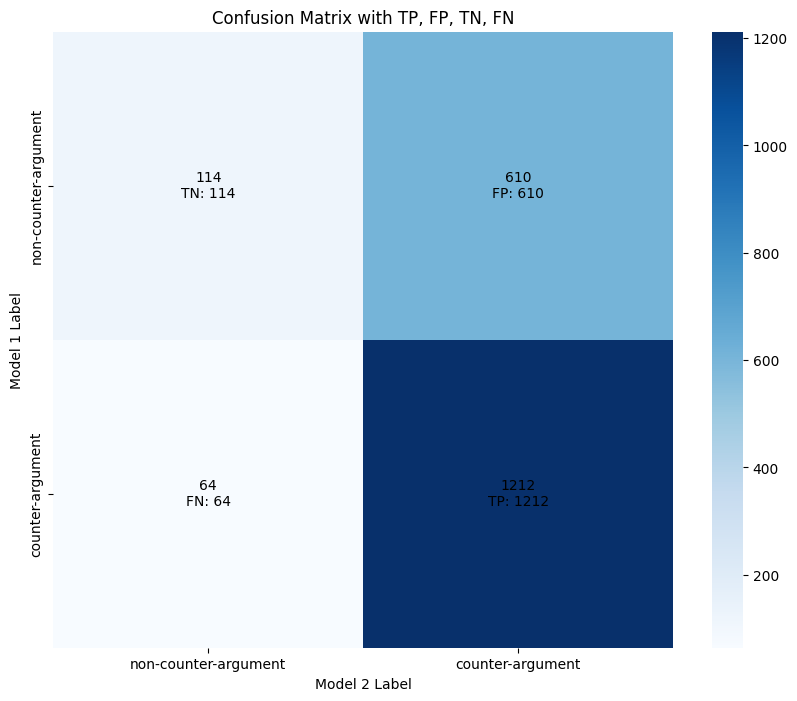

In [43]:
# Measure agreement of the 2 models

# change labels in coun_classifier_label to be instead 'counter-argument' and 'non-counter-argument' instead of 'Counterargument' and 'Not Counterargument'
pairs_small['coun_classifier_label_model1'] = pairs_small['coun_classifier_label_model1'].replace({
    'Counterargument': 'counter-argument',
    'Not Counterargument': 'non-counter-argument'})

print(pairs_small['coun_classifier_label_model1'].value_counts(dropna=False))
print(pairs_small['coun_classifier_label_model2'].value_counts(dropna=False))

kappa = cohen_kappa_score(pairs_small['coun_classifier_label_model1'], pairs_small['coun_classifier_label_model2'])
print(f"Cohen's Kappa: {kappa}")

agreement = (pairs_small['coun_classifier_label_model1'] == pairs_small['coun_classifier_label_model2']).mean()
print(f"Simple Agreement: {agreement}")

# Compute confusion matrix
conf_matrix = confusion_matrix(pairs_small['coun_classifier_label_model1'], pairs_small['coun_classifier_label_model2'],
                               labels=['non-counter-argument', 'counter-argument'])

# Calculate TP, FP, TN, FN
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

# Create a heatmap with additional annotations
plt.figure(figsize=(10, 8))

# Create heatmap
ax = sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues', xticklabels=['non-counter-argument', 'counter-argument'], yticklabels=['non-counter-argument', 'counter-argument'])

# Add additional annotations (TP, FP, TN, FN) under the numbers
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        value = conf_matrix[i, j]
        if i == 1 and j == 1:
            annotation = f'{value}\nTP: {TP}'
        elif i == 0 and j == 1:
            annotation = f'{value}\nFP: {FP}'
        elif i == 1 and j == 0:
            annotation = f'{value}\nFN: {FN}'
        elif i == 0 and j == 0:
            annotation = f'{value}\nTN: {TN}'
        else:
            annotation = f'{value}'
        ax.text(j + 0.5, i + 0.5, annotation, ha='center', va='center', color='black')

# Add labels, title, and display the plot
plt.ylabel('Model 1 Label')
plt.xlabel('Model 2 Label')
plt.title('Confusion Matrix with TP, FP, TN, FN')
plt.show()

#shows that it is mostly FP thats the problem here: model 1 labeled something as non-counter where model 2 label many of those as counter




In [46]:
pairs_small.dtypes

conversation_id                          object
lang                                     object
created_at                               object
id                                       object
text                                     object
author_id                                object
replied_to_reply_count                  float64
referenced_tweets_id                     object
in_reply_to_user_id                      object
PNR                                      object
surveyXact_externke                      object
non_unique_twitter_author_id            float64
started_survey                          float64
rec-nition                              float64
attack                                  float64
A/R                                      object
fasttext_cos_sim_hate_sentence          float64
fasttext_cos_sim_prosocial_sentence     float64
tweeter_username                         object
tweeter_name                             object
pair_num                                

## Applying hate classification model(s)

### HateXplain

Gives hate, offensive and normal 

https://huggingface.co/Hate-speech-CNERG/bert-base-uncased-hatexplain

In [47]:
# Use a pipeline as a high-level helper
pipe_5 = pipeline("text-classification", model="Hate-speech-CNERG/bert-base-uncased-hatexplain", device= 0)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [48]:
text = "I understand, but actually you are incorrect. Science show that the earth is round"
text_2 = "Jeg forstår din pointe, men den er ikke korrekt. Videnskaben viser at jorden er rund"
text_3 = "you fat jewish nigga, i hate you"
text_4 = 'du er så tyk og grim'

# Apply the pipeline to the text
result = pipe_5(text_3)
result


[{'label': 'offensive', 'score': 0.6110802292823792}]

In [49]:
# Test on small df

# List to store the scores
labels_hate = []
scores_hate = []

# Iterate over each text
for text in (tqdm(pairs_small['translated'], desc= "Extracting scores")) :
    result = pipe_5(text)
    # Extract the scores
    label = result[0]['label']
    score = result[0]['score']
    # Append the scores to the lists
    labels_hate.append(label)
    scores_hate.append(score)

# Add the scores as a new column in the DataFrame
pairs_small['label_hatexplain'] = labels_hate
pairs_small['score_hatexplain'] = scores_hate

Extracting scores: 100%|████████████████████| 2000/2000 [01:33<00:00, 21.39it/s]


In [50]:
# look at performance

#pull up text examples
hate = pairs_small[pairs_small['label_hatexplain'] == 'hate']
offensive = pairs_small[pairs_small['label_hatexplain'] == 'offensive']
normal = pairs_small[pairs_small['label_hatexplain'] == 'normal']


print(hate['translated'][:100])

# can print the whole text using
print('hate:')
text_to_print = hate['translated'].head(20).tolist()
print(text_to_print)

print('offensive:')
text_to_print = offensive['translated'].head(20).tolist()
text_to_print

# Seems allright

Series([], Name: translated, dtype: object)
hate:
[]
offensive:


['@BosseStine @RasmusJarlov Jarlov is quite right. However, politically correct halal radicals are willing to deny the truth.',
 '@MivJensen @provinsmor @Kong_Kret My family uses it intensively. I have told them that if they want me something important, then it is called messenger. Snapchat is the worst scum app ever, I can almost burn together over the shit •',
 '@Dittemedmening It\'s not "to talk to racists" who have right-turned the community. It\'s the racists who have done it. Because they want to be heard. And besides, I don\'t do that shit with "we who stand up to racism" I fucking do that too, even though I might do it differently than you do',
 '@lauravilsbaek I simply think it\'s part of the gamer culture. I can read elsewhere that it\'s nothing new. Discover it to football or wherever else they go - fortunately. But "fucking creepy faggot", "suck my... your whore" etc. - then I see red.',
 '@HoghSorensen @Wirlander @Cihat_Bardak @a_esbech @DanskDf1995 Learn a new word? I do 

### Hate roberta

Gives no hate/hate

https://huggingface.co/facebook/roberta-hate-speech-dynabench-r4-target

In [51]:
pipe_6 = pipeline("text-classification", model="facebook/roberta-hate-speech-dynabench-r4-target", device= 0)



config.json:   0%|          | 0.00/816 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [53]:
text = "I understand, but actually you are incorrect. Science show that the earth is round"
text_2 = "Jeg forstår din pointe, men den er ikke korrekt. Videnskaben viser at jorden er rund"
text_3 = "you are a fool"
text_4 = "you are an idiot, i despise you"


# Apply the pipeline to the text
result = pipe_6(text_4)
result


[{'label': 'hate', 'score': 0.99265456199646}]

In [54]:
# Test on small df

# List to store the scores
labels_hate = []
scores_hate = []

# Iterate over each text
for text in (tqdm(pairs_small['translated'], desc= "Extracting scores")) :
    result = pipe_6(text)
    # Extract the scores
    label = result[0]['label']
    score = result[0]['score']
    # Append the scores to the lists
    labels_hate.append(label)
    scores_hate.append(score)

# Add the scores as a new column in the DataFrame
pairs_small['label_hateroberta'] = labels_hate
pairs_small['score_hateroberta'] = scores_hate

Extracting scores: 100%|████████████████████| 2000/2000 [01:37<00:00, 20.59it/s]


In [55]:
# look at performance

#pull up text examples
hate = pairs_small[pairs_small['label_hateroberta'] == 'hate']
nothate = pairs_small[pairs_small['label_hateroberta'] == 'nothate']


# can print the whole text using
print('hate:')
text_to_print = hate['translated'].head(20).tolist()
print(text_to_print)

# Does catch some hate, but probably a little too generous. Classify something as hate that is moreso offensive/harsh, or tweets talking about hate etc.
# An idea could be to limit hate labels to be when the hate-score is above 0.8


hate:
['@JanniMT @BrondbyIF Please turn yourself down and pick up your suck, please.', '@tcjakobsen @RunestenConsult You misinterpret what I write, Troels. I try again; my point is that it is not unique to poverty. Everyone is allowed their opinion and everyone can express it.', 'Too bad to be you, young man who lost in the lottery and therefore has to go to a skedgymnasium far from your residence and your friends. Unfortunately, you are just one of the eggs we have to smash in order to make the Social Democratic Omelette.', "@kbo1978 I simply don't think people can understand the feeling of discomfort it gives when you autist experience something that upsets your senses. People can't mentalize the situation properly - which is ironic, because it's we it's said has no empathy and mentalization ability", "@teodora_hansen The industry needs all the hands they can get right now, so it's scary that you're only 2 in the class, and be hampered by the fact that not professional knowledge is n

## Finetuning a model on labeled counterspeech data (CONAN)

CONAN (COunter NArratives through Nichesourcing): A dataset containing counterspeech responses to hate speech. Data is French, italian and English

https://github.com/marcoguerini/CONAN

https://aclanthology.org/P19-1271.pdf

In [1]:
!pip install pandas
import pandas as pd


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# Inspect CONAN data
conan = pd.read_csv('/Users/idahelenedencker/Desktop/CONAN.csv')

#14988 pairs of hate/counterspeech

In [3]:
conan

,cn_id,hateSpeech,counterSpeech,hsType,hsSubType,cnType,age,gender,educationLevel
0,ENT1ST0001HS0033CN000021,"According to a recent OFSTED report, a school ...","To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
1,ENT1ST0001HS0033CN000021P1,In Birmingham there is a school where girls an...,"To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
2,ENT1ST0001HS0033CN000021P2,A school in Birningham is still separating gir...,"To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
3,ENT1ST0001HS0033CN000022,"According to a recent OFSTED report, a school ...",While this story is presented as an 'Islamic i...,Islamophobia,crimes,facts,61.0,male,Bachelor
4,ENT1ST0001HS0033CN000022P1,In Birmingham there is a school where girls an...,While this story is presented as an 'Islamic i...,Islamophobia,crimes,facts,61.0,male,Bachelor
...,...,...,...,...,...,...,...,...,...
14983,ITT1ST0023HS0055CN001068T1,A woman who accepts to live hidden under a vei...,"No woman agrees to be beaten, be unable to bre...",Islamophobia,women,facts,NaN,NaN,NaN
14984,ITT1ST0023HS0055CN001069,Una donna che accetta di vivere nascosta sotto...,Leggere commenti di donne capaci di scrivere t...,Islamophobia,women,hypocrisy,41.0,female,High school
14985,ITT1ST0023HS0055CN001069P1,Una donna che permette di farsi coprire con un...,Leggere commenti di donne capaci di scrivere t...,Islamophobia,women,hypocrisy,41.0,female,High school
14986,ITT1ST0023HS0055CN001069P2,In Italia non possiamo accogliere donne che de...,Leggere commenti di donne capaci di scrivere t...,Islamophobia,women,hypocrisy,41.0,female,High school


In [4]:
conan['counterSpeech'].nunique()

6803

In [5]:
#Keep only columns with unique values 

# Drop duplicate rows based on counterSpeech
conan.drop_duplicates(subset=['counterSpeech'], inplace=True)

In [6]:
!pip install transformers datasets pandas scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [7]:
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict


# Create a binary label column: 1 for counter speech, 0 for hate speech
conan['label'] = 1  # since we are only interested in counter speech

# Select relevant columns
conan = conan[['counterSpeech', 'label']]
conan = conan.rename(columns={'counterSpeech': 'text'})

# Split into train and validation sets
train_data, val_data = train_test_split(conan, test_size=0.2, random_state=42)


In [113]:
# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_data)
val_dataset = Dataset.from_pandas(val_data)
datasets = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset
})

In [114]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

tokenized_datasets = datasets.map(tokenize_function, batched=True)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/5442 [00:00<?, ? examples/s]

Map:   0%|          | 0/1361 [00:00<?, ? examples/s]

In [119]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    fp16=True,  # Enable mixed precision training
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
)

trainer.train()


ValueError: fp16 mixed precision requires a GPU (not 'mps').

In [8]:
from transformers import  AutoModelForSequenceClassification, AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english" # Define which pre-trained model we will be using
classifier = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2) # Get the classifier
tokenizer = AutoTokenizer.from_pretrained(checkpoint) # Get the tokenizer

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [9]:
from sklearn.model_selection import train_test_split

conan = conan.rename(columns={'label': 'target'})
df_train, df_eval = train_test_split(conan, train_size=0.8,stratify=conan.target, random_state=42) # Stratified splitting



In [10]:
from datasets import Dataset, DatasetDict
raw_datasets = DatasetDict({
    "train": Dataset.from_pandas(df_train),
    "eval": Dataset.from_pandas(df_eval)
})

In [11]:
# Check the datasets
print("Dataset Dict:\n", raw_datasets)
print("\n\nTrain's features:\n", raw_datasets["train"].features)
print("\n\nFirst row of Train:\n", raw_datasets["train"][0])

Dataset Dict:
 DatasetDict({
    train: Dataset({
        features: ['text', 'target', '__index_level_0__'],
        num_rows: 5442
    })
    eval: Dataset({
        features: ['text', 'target', '__index_level_0__'],
        num_rows: 1361
    })
})


Train's features:
 {'text': Value(dtype='string', id=None), 'target': Value(dtype='int64', id=None), '__index_level_0__': Value(dtype='int64', id=None)}


First row of Train:
 {'text': 'Non credo che la religione sia una questione di concorrenza.', 'target': 1, '__index_level_0__': 13420}


In [13]:
# Tokenize the text, and truncate the text if it exceed the tokenizer maximum length. Batched=True to tokenize multiple texts at the same time.
tokenized_datasets = raw_datasets.map(lambda dataset: tokenizer(dataset['text'], truncation=True), batched=True)
print(tokenized_datasets)

Map:   0%|          | 0/5442 [00:00<?, ? examples/s]

Map:   0%|          | 0/1361 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'target', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 5442
    })
    eval: Dataset({
        features: ['text', 'target', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 1361
    })
})


In [14]:
# Check the first row
print(tokenized_datasets["train"][0])

{'text': 'Non credo che la religione sia una questione di concorrenza.', 'target': 1, '__index_level_0__': 13420, 'input_ids': [101, 2512, 13675, 26010, 18178, 2474, 4676, 2063, 9033, 2050, 14477, 3160, 2063, 4487, 9530, 27108, 7389, 4143, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [15]:
tokenized_datasets = tokenized_datasets.remove_columns(["text", "__index_level_0__"])
tokenized_datasets = tokenized_datasets.rename_column("target", "labels")
print(tokenized_datasets)

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 5442
    })
    eval: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 1361
    })
})


In [16]:
!pip -q install evaluate


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [17]:
from transformers import DataCollatorWithPadding, TrainingArguments, Trainer
import numpy as np
import evaluate

# Padding for batch of data that will be fed into model for training
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Training args 
training_args = TrainingArguments("test-trainer", num_train_epochs=1, evaluation_strategy="epoch", 
                                  weight_decay=5e-4, save_strategy="no", report_to="none")

# Metric for validation error
def compute_metrics(eval_preds):
    metric = evaluate.load("glue", "mrpc") # F1 and Accuracy
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Define trainer
trainer = Trainer(
    classifier,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["eval"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics)

#If this gives an error like fp16 mixed precision requires a GPU (not 'mps')., restart kernel and run again


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [18]:
# Start the fine-tuning 
trainer.train()

Epoch,Training Loss,Validation Loss


RuntimeError: MPS backend out of memory (MPS allocated: 1.05 GB, other allocations: 7.95 GB, max allowed: 9.07 GB). Tried to allocate 89.42 MB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).

## (maybe) Finetuning the bestperforming huggingface counterspeech classifier model on a labeled danish dataset (i can label some?)

## Applying the jigsaw perspective API


1) TOXICITY = rude, disrespectful, or unreasonable comment 
2) SEVERE_TOXICITY = A very hateful, aggressive, disrespectful comment 
3) IDENTITY_ATTACK = Negative or hateful comments targeting someone because of their identity.
4) INSULT = Insulting, inflammatory, or negative comment towards a person or a group of people.
5) PROFANITY = Swear words, curse words, or other obscene or profane language.
6) THREAT = Describes an intention to inflict pain, injury, or violence against an individual or group.

Available languages for these attributes include sweedish, test that

In [ ]:
!pip install --upgrade googleapiclient
!pip install --upgrade json


In [ ]:
from googleapiclient import discovery
import json

In [ ]:
API_key= 0000

#Generates API client object dynamically based on service name and version
service= discovery.build('commentanalyzer', 'v1alpha1', developerKey= API_key)

analyze_request = {
    'comment': {'text': 'i like your shirt'},
    'requestedAttributes': {'TOXICITY':{}}
}

response = service.comments().analyze(body= analyze_request).execute()

print json.dumps(response, indent= 2)
